In [18]:
# Importazione dei dati

import pandas as pd
df = pd.read_csv('./Data/titanic.csv')

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
from sklearn import preprocessing

# Pulizia dei dati 
x=df[df.columns.difference(['Survived', 'PassengerId','Name','Age','Ticket','Cabin','Embarked'])].to_numpy()
y=df.to_numpy()[:,1].astype(int)

for d in x:
    d[3] = int(d[3] == "male")
# x["Sex"] = (x["Sex"] == "male").astype(int)

import collections
collections.Counter(y)

Counter({0: 549, 1: 342})

In [21]:
# suddivide le osservazioni nei due insiemi

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y, random_state = 123)

In [22]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
tree_clf.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = tree_clf.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 1 0 1 0 1 0 1]
dati reali presenti nel dataset di test = [0 1 0 0 0 1 0 0 1 1]


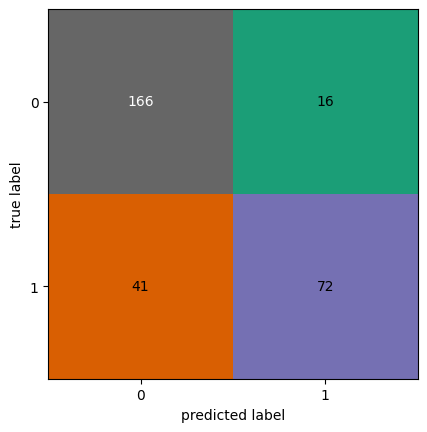

In [23]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       182
           1       0.82      0.64      0.72       113

    accuracy                           0.81       295
   macro avg       0.81      0.77      0.78       295
weighted avg       0.81      0.81      0.80       295



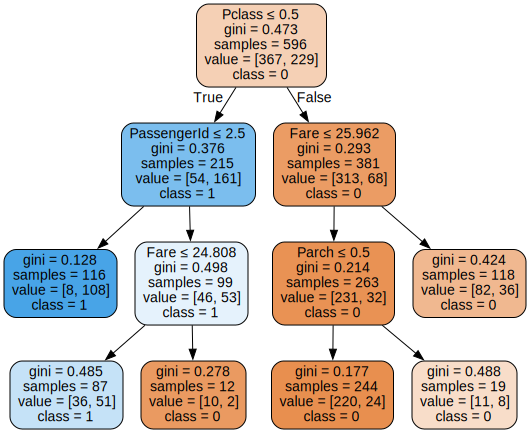

In [29]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.difference(['Survived','Name','Age','Ticket','Cabin','Embarked']))

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

In [ ]:
# previsione per Ugo

# Pclass, Sex, SibSP, Parch, Fare
Me = [[2, "male", 0, 0, 13.000]]

Me[0][1] = int(Me[0][1] == "male")

# Conversione dei dati in numeri
# le = preprocessing.LabelEncoder()
# for i in range(Me.shape[1]):
#     Me[i] = le.fit_transform(Me[i])


predic = tree_clf.predict(Me)
predic

array([1])